Populating the interactive namespace from numpy and matplotlib
agegroups
40-60Years    162
60-80Years    119
80-90Years     15
Over90          3
Name: age, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


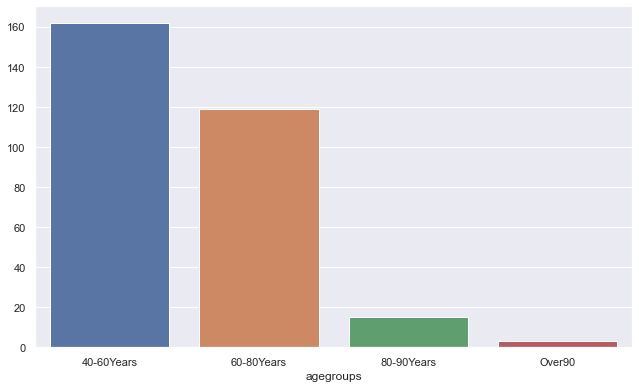

In [154]:
## importing libraries and files into data frame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%pylab inline


path='c:/users/ssharma1/Saurabh-JupyterNotebooks/assignment2/DataFiles/'
filename='heart_failure_clinical_records_dataset.csv'
df=pd.read_csv(f'{path}{filename}',delimiter=',')
dash="\n--------------------------------------------------------------\n"

#Data prep no nulls found
anynuls=df.isnull().sum().sum()
#print(anynuls)

#[code-ref#1] - Adding a column for age buckets
conditions = [
    (df['age'] < 40),
    (df['age'] >= 40) & (df['age'] <= 60),
    (df['age'] > 60) & (df['age'] <= 80),
    (df['age'] > 80) & (df['age'] <= 90),
    (df['age'] > 90)
    ]

# create a list of the values we want to assign for each condition
values = ['Under40', '40-60Years', '60-80Years', '80-90Years','Over90']

# create a new column and use np.select to assign values to it using our lists as arguments

df['agegroups'] = np.select(conditions, values)
#all records split into age buckets

#[python-code-ref#2] - overall data set graph 
agebuckets=df.groupby('agegroups')['age'].count()
print(agebuckets)
sns.set(rc={'figure.figsize':(10.7,6.27)})
print(sns.barplot(y=agebuckets.values,x=agebuckets.index))

agegroups
40-60Years    44
60-80Years    39
80-90Years    10
Over90         3
Name: DEATH_EVENT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


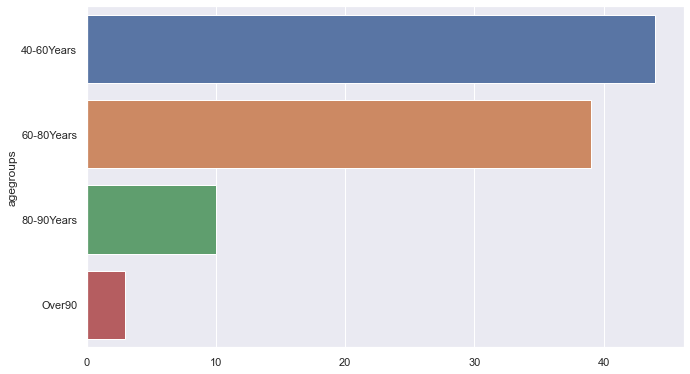

In [155]:
# [python-code-ref#3] - death cases in age buckets including both males & females
deaths=df[df.DEATH_EVENT==0].count()
death_agebucket=df.groupby('agegroups')['DEATH_EVENT'].sum()
sns.set(rc={'figure.figsize':(10.7,6.27)})
print(death_agebucket)
print(sns.barplot(x=death_agebucket.values,y=death_agebucket.index))

sex
female    34
male      62
Name: DEATH_EVENT, dtype: int64


<AxesSubplot:xlabel='sex'>

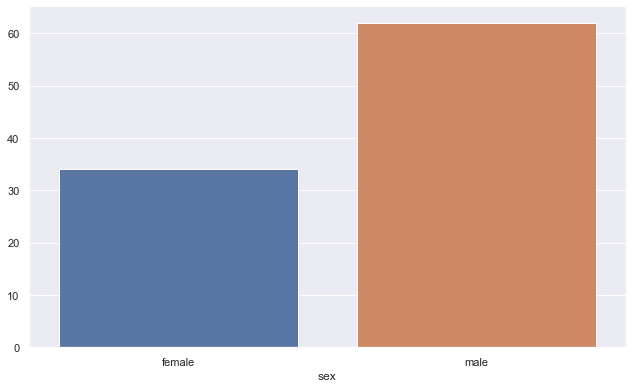

In [150]:
#[python-code-ref#4] -cases of deaths in males & females
df['sex'].replace({1:"male",0:"female"},inplace=True)
deaths=df.groupby('sex')['DEATH_EVENT'].sum()
print(deaths)
sns.set(rc={'figure.figsize':(10.7,6.27)})
sns.barplot(y=deaths.values,x=deaths.index)


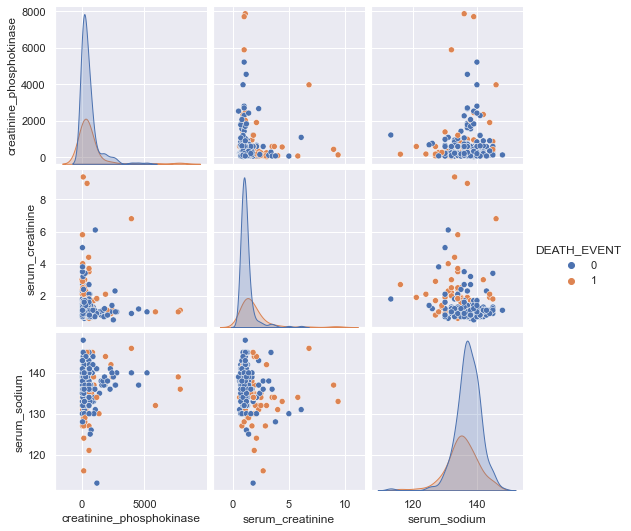

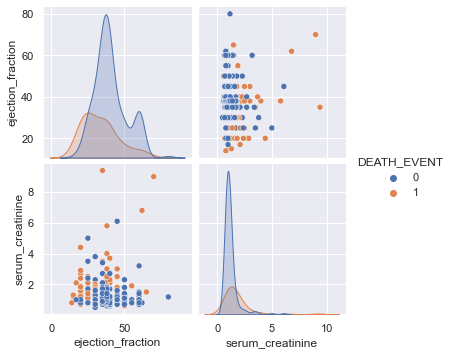

In [157]:
#[python-code-ref#5] ## blood work readings analysis in death cases
df1=df[['creatinine_phosphokinase','serum_creatinine','serum_sodium', 'DEATH_EVENT']]
df2=df[['ejection_fraction','platelets','DEATH_EVENT']]
df3=df[['ejection_fraction','serum_creatinine','DEATH_EVENT']]
sns.set(rc={'figure.figsize':(14.7,10.27)})
sns.pairplot(data=df1,hue="DEATH_EVENT")
sns.pairplot(data=df3,hue="DEATH_EVENT")


In [162]:
#[python-code-ref#6]  percentage deaths based on conditions
import numpy as np
def per(col):
    total=df.query(f'{col}==1')[f'{col}'].sum()
    deaths=df.query(f'{col}==1')['DEATH_EVENT'].sum()
    print(f'Total {col} records = {total}\nTotal Fatalities in {col} records = {deaths}')
    print(f"Fatality Percentage in {col} records = {round(deaths/total*100,1)} %")
    
    
print(per('smoking'))
print('=======================')
print(per('diabetes'))
print('=======================')
print(per('anaemia'))
print('=======================')
print(per('high_blood_pressure'))

Total smoking records = 96
Total Fatalities in smoking records = 30
Fatality Percentage in smoking records = 31.2 %
None
Total diabetes records = 125
Total Fatalities in diabetes records = 40
Fatality Percentage in diabetes records = 32.0 %
None
Total anaemia records = 129
Total Fatalities in anaemia records = 46
Fatality Percentage in anaemia records = 35.7 %
None
Total high_blood_pressure records = 105
Total Fatalities in high_blood_pressure records = 39
Fatality Percentage in high_blood_pressure records = 37.1 %
None


In [126]:
#[python-code-ref#7] #mean calculation in fatal and non fatal cases
df_deaths=df[df.DEATH_EVENT==1]
df_deaths_mean=round(df_deaths[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']].median(),1)
df_nodeath=df[df.DEATH_EVENT==0]
df_nodeath_mean=round(df_nodeath[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']].median(),1)
results=pd.concat([df_deaths_mean,df_nodeath_mean],axis=1,join='inner')
results.columns=['Fatal-Cases','Non-Fatal-Cases']
print(results)


                          Fatal-Cases  Non-Fatal-Cases
creatinine_phosphokinase        259.0            245.0
ejection_fraction                30.0             38.0
platelets                    258500.0         263000.0
serum_creatinine                  1.3              1.0
serum_sodium                    135.5            137.0


Populating the interactive namespace from numpy and matplotlib
Please provide input to see death counts in case of
1=Diabetes
2=Smoker
3=High Blood Pressure
4=Anaemia
5=Quit
4
sex
female    20
male      26
Name: DEATH_EVENT, dtype: int64


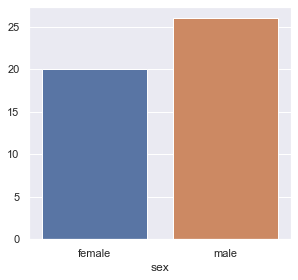

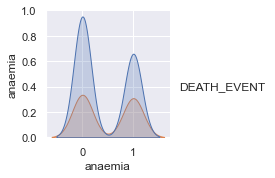

In [172]:
#[python-code-ref#8] - generates data and graphs based on user input 
# pass column name in condition to get the graph & values printed.
# enter one of the following into condition variable and run = diabetes | smoking | high_blood_pressure | anaemia

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%pylab inline


path='c:/users/ssharma1/Saurabh-JupyterNotebooks/assignment2/DataFiles/'
filename='heart_failure_clinical_records_dataset.csv'
df=pd.read_csv(f'{path}{filename}',delimiter=',')
dash="\n--------------------------------------------------------------\n"


condition=int(input("Please provide input to see death counts in case of\n1=Diabetes\n2=Smoker\n3=High Blood Pressure\n4=Anaemia\n5=Quit\n"))
#condition='anaemia'

df['sex'].replace({1:"male",0:"female"},inplace=True)
if condition==1:
        snsdf=df[(df.DEATH_EVENT==1) & (df.diabetes==1)]
        pairplotdf=df[['DEATH_EVENT','diabetes']]
        df2=df[['DEATH_EVENT','diabetes']]
elif condition==2:
        snsdf=df[(df.DEATH_EVENT==1) & (df.smoking==1)]
        pairplotdf=df[['DEATH_EVENT','smoking']]
        df2=df[['DEATH_EVENT','smoking']]
elif condition==3:
        snsdf=df[(df.DEATH_EVENT==1) & (df.high_blood_pressure==1)]
        pairplotdf=df[['DEATH_EVENT','high_blood_pressure']]
        df2=df[['DEATH_EVENT','high_blood_pressure']]
elif condition==4:
        snsdf=df[(df.DEATH_EVENT==1) & (df.anaemia==1)]
        pairplotdf=df[['DEATH_EVENT','anaemia']]
        df2=df[['DEATH_EVENT','anaemia']]
elif condition==5:
    print('thanks for using!')
else:
    print('please start again and provide a valid input')
        
tempdf=snsdf.groupby('sex')['DEATH_EVENT'].sum()
print('==================')
print(tempdf)
print('==================')
sns.set(rc={'figure.figsize':(4.7,4.27)})
sns.barplot(y=tempdf.values,x=tempdf.index)
sns.pairplot(data=df2,hue="DEATH_EVENT")